# <center>CMSE 201 Final Project</center>

<p style="text-align: left;"> Peter Fu Chen
<p style="text-align: left;"> Section_003
<p style="text-align: left;"> Date

# ___Can machine learning be used to predict future stock price?___

## Background and Motivation

_In order to build models to forecast the trajectory of stock prices, we need historical trading prices. We often claim that historical events are astonishingly similar, and this notion is essential for identifying the stock trend._

_In this study, I'm working under the premise that both the buyer and the seller determine the stock price, and that the trading price of a stock on a given day is influenced by many trading days prior to that trading day. This research's foundation is solely based on adaptive analysis, without taking into account any factors that affect the fundamental value. Such as Macroeconomics changing, idiosyncratic risk, and so on._

_Consequently, this research is a preliminary attempt to forecast the stock price. It seeks to show readers examples of how Python may be used for stock forecasting and not for any financial advice or recommendation._

_This research will be laid out in two parts. First, we will take a look at all the stock data and see if we can find any interesting story behind them. Then we will take a look at the correlation between them, just like what we studied in class. Second, we will use models to predict future prices. Because this class is intended to be an introduction class. I will not write the whole model from scratch. Instead, I found some quite useful package which is easier for readers to grasp an idea of how models work._

## Methodology

### This research is carried out from the following aspects.

_1. What is the change in stock price over a period of time?_


We can then grasp a basic idea of how stocks are correlated in a systematic way. For this research, I picked four of the largest weighted holdings in the S&P 500 index. 


_2. What is the moving average of various stocks?_

The way I calculate the moving average will be using rolling.mean function that is already built in.
This  method is referenced from others and I will put the website in that part and also the citation at the end.

_3. What is the average return rate of the stock?_

From this work, I intend to conduct a simple analysis comparing these four stocks' average returns from September 2018. The method to calculate average return is the same as we covered in this semester's in-class assignment. Since my data are all constructed in Pandas Dataframe, I will use the pct.change method to do calculations.

_4. What is the correlation between different stocks?_

This part is one of the most important parts showing how I quantify the correlation and how to plot it.
As we can see, even these four stocks are all from S&P 500. But because they are in different sectors, they perform in different ways.

_5. How can we predict the future stock price?_

For this part, I will use two models I found online to let me test out if machine learning can actually predict the future trend of the stocks or not. I will put my reference code website in this section and also at the end.

*Installation*

We need to install Python's data science toolkits such as numpy, pandas, matplotlib.

In [37]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
%matplotlib inline

We first write a function to get the data of the stock price we need.

In this research, we will only focus on stock prices from 2018/01/01 to 2019/01/01 in order to prevent the COVID-19 stock market crash influence the study.

The package we will extract data is using Yfinance. Yfinance is an open-source Python package that is simple to use but powerful. Through this package, we can get all the securities information listed in Yahoo Finance that contains historical data.

Yfinance will automatically create a pandas data frame for our data.

Package Website: [Yfinance](https://pypi.org/project/yfinance/)

In [38]:
def get_data(ticker):
                #Year/Month/Day
    starttime = "2018-01-01" # Start
    endtime = "2019-01-01" # End
    return yf.download(ticker,starttime,endtime,auto_adjust=True)

In [39]:
# We will only focus on the closing price of the stocks

aapl = get_data("AAPL")
aaplclose = aapl[["Close"]]
aaplclose = aaplclose.dropna()

msft = get_data("MSFT")
msftclose = msft[["Close"]]
msftclose = msftclose.dropna()

amzn = get_data("AMZN")
amznclose = amzn[["Close"]]
amznclose = amznclose.dropna()

brkb = get_data("BRK-B")
brkbclose = brkb[["Close"]]
brkbclose = brkbclose.dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


*Historical closing price*

Four stocks' historical closing prices were plotted using Matplotlib, and the historical price trend chart shows that the four stocks' tendencies are similar because these four stocks we picked to study are the top 4 weighted stocks in S&P 500. They are followed by a period of economic boom and reached to a turning point and start to decline due to recession. Following a real business cycle model (RBC).

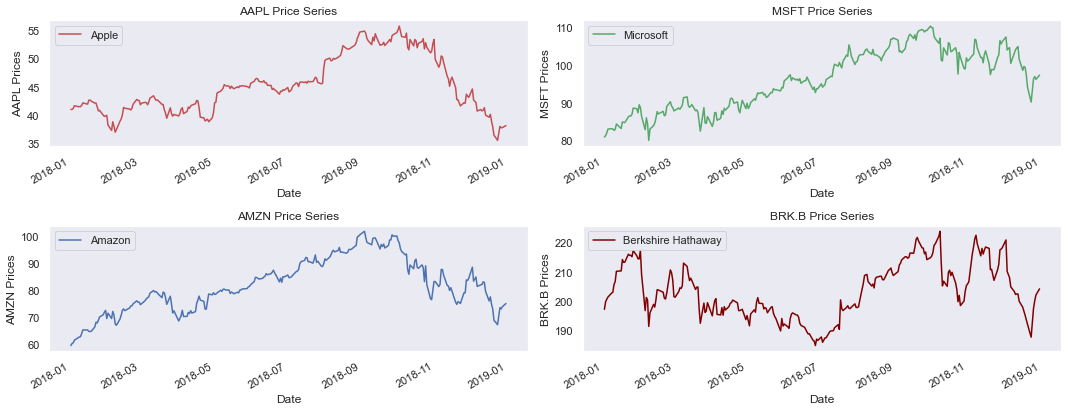

In [40]:
plt.figure(figsize=(15,8))
sns.set(style='darkgrid')

plt.subplot(3,2,1)
aaplclose.Close.plot(color='r',label = "Apple")
plt.grid()
plt.ylabel("AAPL Prices")
plt.title("AAPL Price Series")
plt.legend(loc = "upper left")

plt.subplot(3,2,2)
msftclose.Close.plot(color='g',label = "Microsoft")
plt.grid()
plt.ylabel("MSFT Prices")
plt.title("MSFT Price Series")
plt.legend(loc = "upper left")

plt.subplot(3,2,3)
amznclose.Close.plot(color='b',label = "Amazon")
plt.grid()
plt.ylabel("AMZN Prices")
plt.title("AMZN Price Series")
plt.legend(loc = "upper left")

plt.subplot(3,2,4)
brkbclose.Close.plot(color='maroon',label = "Berkshire Hathaway")
plt.grid()
plt.ylabel("BRK.B Prices")
plt.title("BRK.B Price Series")
plt.legend(loc = "upper left")


plt.tight_layout()

*Daily trading volume*

The average volume of a single securities transaction over the period of a trading day or a certain period of time.

Trading and a security's liquidity are related. Security is easy to trade and has high liquidity when its average daily trading volume is high. As a result, the price of securities may be impacted by the average daily trading volume. Low trading volume typically results in lower prices for the securities because fewer people are willing to purchase them. However, we are not making a conclusion that higher trading volume will cause higher prices or vice versa.

Indeed, as we can observe in the graph. MSFT among others has the lowest trading volume in September 2018. But the share price shows a constant climb. As AAPL and AMZN both have high trading volumes. But as we see from the historical prices. They both peaked and started to trend downward. 

Observing trading  volume can be useful for us to examine when buyers and sellers are both interested in placing bets on future prices. It is an important component for us to study the risk of the securities involved.

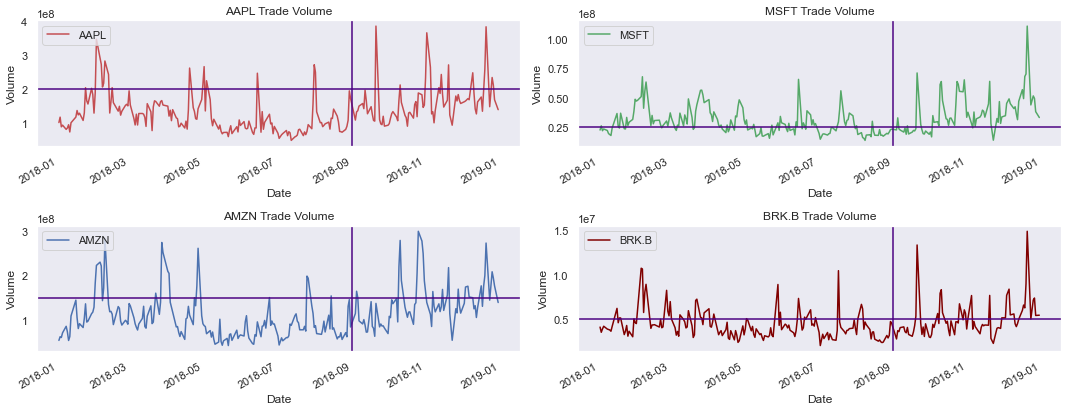

In [41]:
plt.figure(figsize=(15,8))
sns.set()

plt.subplot(3,2,1)
aapl.Volume.plot(color='r')
plt.grid()
plt.legend(["AAPL"],loc = "upper left")
plt.ylabel("Volume")
plt.axvline(x = "2018-09-01",color = "indigo")
plt.axhline(y = 2e8,color = "indigo")
plt.title("AAPL Trade Volume")

plt.subplot(3,2,2)
msft.Volume.plot(color='g')
plt.grid()
plt.legend(["MSFT"],loc = "upper left")
plt.ylabel("Volume")
plt.axvline(x = "2018-09-01",color = "indigo")
plt.axhline(y = 0.25e8,color = "indigo")
plt.title("MSFT Trade Volume")

plt.subplot(3,2,3)
amzn.Volume.plot(color='b')
plt.grid()
plt.legend(["AMZN"],loc = "upper left")
plt.ylabel("Volume")
plt.axvline(x = "2018-09-01",color = "indigo")
plt.axhline(y = 1.5e8,color = "indigo")
plt.title("AMZN Trade Volume")

plt.subplot(3,2,4)
brkb.Volume.plot(color='maroon')
plt.grid()
plt.legend(["BRK.B"],loc = "upper left")
plt.ylabel("Volume")
plt.axvline(x = "2018-09-01",color = "indigo")
plt.axhline(y = 0.5e7,color = "indigo")
plt.title("BRK.B Trade Volume")

plt.tight_layout()

*Moving Average*

For the moving average, we will be using Simple Moving Average (SMA).


The average closing price of a stock in a specific period. The moving average is called "moving" because the stock price keeps changing, so the moving average also changes. SMA is one of the core technical indicators. Technical analysis is a form of investment valuation, which analyzes past prices and predicts future price trends.

Code reference: [How to calculate MOVING AVERAGE in a Pandas DataFrame?](https://www.geeksforgeeks.org/how-to-calculate-moving-average-in-a-pandas-dataframe/)

In [42]:
aaplclose["SMA10"] = aaplclose["Close"].rolling(10).mean()
aaplclose["SMA20"] = aaplclose["Close"].rolling(20).mean()
aaplclose["SMA50"] = aaplclose["Close"].rolling(50).mean()

msftclose["SMA10"] = msftclose["Close"].rolling(10).mean()
msftclose["SMA20"] = msftclose["Close"].rolling(20).mean()
msftclose["SMA50"] = msftclose["Close"].rolling(50).mean()

amznclose["SMA10"] = amznclose["Close"].rolling(10).mean()
amznclose["SMA20"] = amznclose["Close"].rolling(20).mean()
amznclose["SMA50"] = amznclose["Close"].rolling(50).mean()

brkbclose["SMA10"] = brkbclose["Close"].rolling(10).mean()
brkbclose["SMA20"] = brkbclose["Close"].rolling(20).mean()
brkbclose["SMA50"] = brkbclose["Close"].rolling(50).mean()

<Figure size 576x432 with 0 Axes>

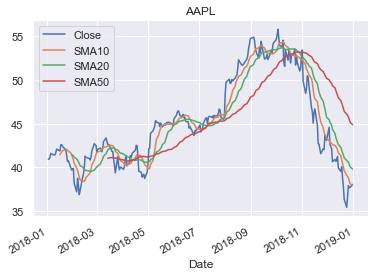

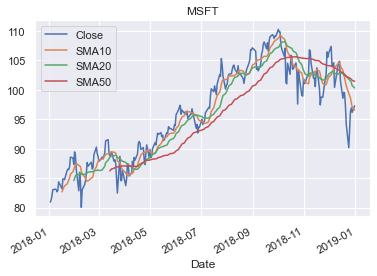

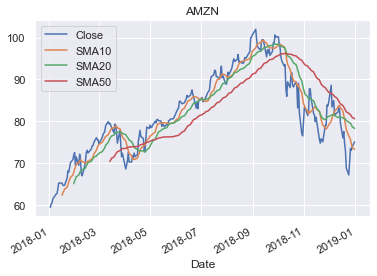

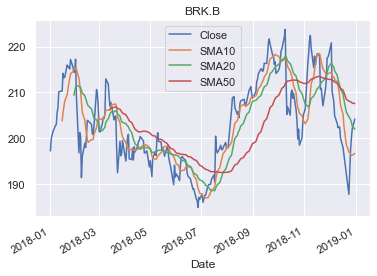

In [43]:
plt.figure(figsize=(8,6));
sns.set()

aaplclose[["Close","SMA10","SMA20","SMA50"]].plot(title = "AAPL");
msftclose[["Close","SMA10","SMA20","SMA50"]].plot(title = "MSFT");
amznclose[["Close","SMA10","SMA20","SMA50"]].plot(title = "AMZN");
brkbclose[["Close","SMA10","SMA20","SMA50"]].plot(title = "BRK.B");

*Percent Change*

After performing some preliminary analysis, we will now continue to look into it. Let's now examine the stock risk. To determine the daily percentage change, in this case, we use pct_change, which we have studied in class. This technique allows us to determine when the stock is comparatively more volatile. 

Something interesting here, as we can observe in the graph. In 2018-08, the AAPL stock price jumped up all of a sudden so does the sudden increase in the trading volume. What happened? Well, there was nothing happened in August, but Apple inc. hold the Apple event in 2018 September to release the Apple Watch Series 4, iPhone XS and XS Max, and so on. Due to the record sale of the iPhone X in the past year. Investors predict these new products will be a big hit as well.

Investors placed a huge bet well before the release of the new products and it is well reflected in the share price.

Therefore, the stock share price can define as an expectation of the future company's performance. It can happen well before the actual news come out.

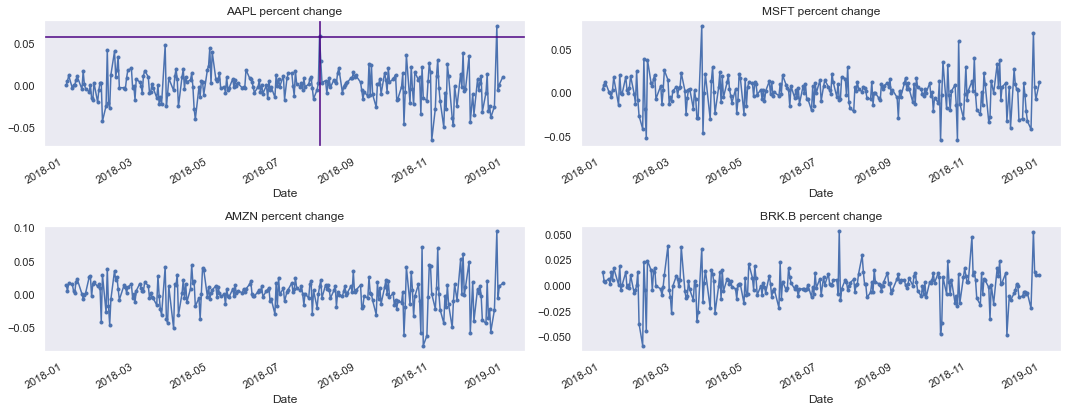

In [44]:
plt.figure(figsize=(15,8))
sns.set()

aaplpct = aapl.pct_change(fill_method ='ffill')
plt.subplot(3,2,1)
plt.title("AAPL percent change")
aaplpct["Close"].plot(linestyle = "solid", marker = ".")
plt.axvline(x = "2018-08-01",color = "indigo")
plt.axhline(y = 0.058,color = "indigo")
plt.grid()

msftpct = msft.pct_change(fill_method ='ffill')
plt.subplot(3,2,2)
plt.title("MSFT percent change")
msftpct["Close"].plot(linestyle = "solid", marker = ".")
plt.grid()

amznpct = amzn.pct_change(fill_method ='ffill')
plt.subplot(3,2,3)
plt.title("AMZN percent change")
amznpct["Close"].plot(linestyle = "solid", marker = ".")
plt.grid()

brkbpct = brkb.pct_change(fill_method ='ffill')
plt.subplot(3,2,4)
plt.title("BRK.B percent change")
brkbpct["Close"].plot(linestyle = "solid", marker = ".")
plt.grid()

plt.tight_layout()

*Correlation between stock closing prices*

As we mentioned in part 1 of this research, the closing price for these four stocks is pretty similar. But how similar?

It turns out we can quantify it. We will use the powerful package called *seaborn* to help us conduct analysis of correlation.

Package Website: [Seaborn](https://seaborn.pydata.org/index.html)


Feel free to check it out for more functions!

In order for seaborn to calculate the correlation.

We will first concat all the percent change of these 4 stocks into one dataFrame


In [45]:
df = pd.DataFrame(aaplpct.Close)
df1 = pd.DataFrame(msftpct.Close)
df2 = pd.DataFrame(amznpct.Close)
df3 = pd.DataFrame(brkbpct.Close)

df_col_merged = pd.concat([df,df1,df2,df3],axis = 1)
df_col_merged.columns = ["aapl","msft","amzn","brkb"]
display(df_col_merged)

,aapl,msft,amzn,brkb
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.004654,0.012775,0.013031
2018-01-04,0.004645,0.008802,0.004476,0.004505
2018-01-05,0.011385,0.012398,0.016163,0.003637
2018-01-08,-0.003714,0.001021,0.014425,0.006554
...,...,...,...,...
2018-12-24,-0.025874,-0.041739,-0.024313,-0.022592
2018-12-26,0.070421,0.068310,0.094452,0.052248
2018-12-27,-0.006490,0.006165,-0.006295,0.012907


First, let's look at the comparison between aapl and itself. Should show a perfect linear relationship.

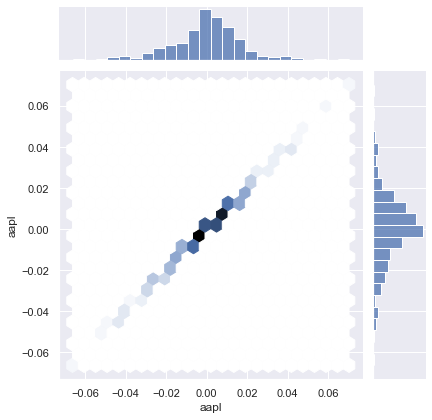

In [46]:
sns.jointplot(x= "aapl",
              y = "aapl",
              kind='hex',
              data=df_col_merged);

We can use the seaborn package sns.pairplot () to create the plot of correlation automatically.

Package Website: [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

As we can see, these four stocks compared with each other, all show a positive correlation.

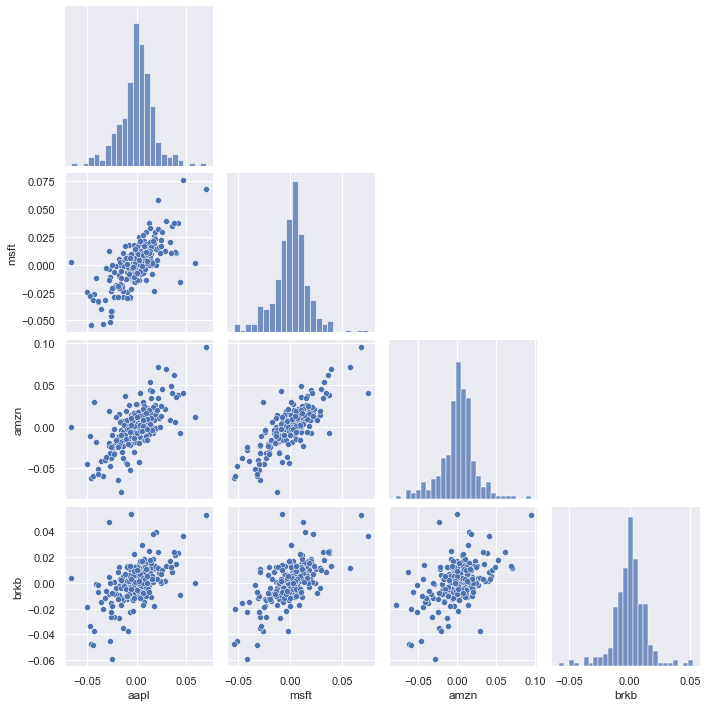

In [47]:
sns.pairplot(df_col_merged,kind = "scatter", corner=True);

Here is seaborn another powerful tool. We can use sns.heatmap to show the correlation between these stocks.

From the plot, even though they are all positive correlations.

BRK.B versus three other stocks are the most neutral.

MSFT to AMZN has the strongest correlation. Why is that? It probably becasue that both of these two stocks are tech company.

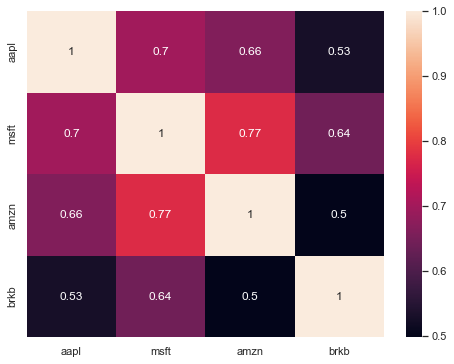

In [48]:
plt.figure(figsize=(8,6));
sns.heatmap(df_col_merged.corr(),annot = True);

*Using Monte Carlo Simulation to Predict Stock Trend*

In this part, we will conduct simple machine learning technique to predict stock trend.


First, I will use the Monte Carlo Simulation.

* Code reference: [How to Create a Monte Carlo Simulation using Python](https://towardsdatascience.com/how-to-create-a-monte-carlo-simulation-using-python-c24634a0978a)


* Code reference: [Simulating Random Walk of Stock Prices with Monte Carlo Simulation in Python](https://medium.com/the-handbook-of-coding-in-finance/simulating-random-walk-of-stock-prices-with-monte-carlo-simulation-in-python-6e233d841e)

We will use Monte Carlo simulation to observe the potential changes of stock prices over time, assuming that their daily returns obey normal distribution. This type of price evolution is also called "random walk".

We need to make an estimation of the relevant stocks' Compound Annual Growth Rate and Annual Volatility in order to create the simulation. From previous prices, these numbers can be approximated. The easiest method is to presume that the average return and volatility level from the past will persist in the future. We will define simple return and volatility levels based on past price data. In order to keep things simple and concentrate on the coding.

In [49]:
trading_days = len(aaplclose)
print("Total Trading Days for AAPL:",trading_days,"days")

Total Trading Days for AAPL: 251 days


[Compound Annual Growth Rate (CAGR)](https://i.insider.com/60f8617cfc253600181fa547?width=1300&format=jpeg&auto=webp)

$CAGR = (\frac{Final\ Value}{Starting \ Value} )^{\frac{1}{N}} -1$

In [50]:
cagr = ((aaplclose["Close"][-1] / aaplclose["Close"][0])**(1/251)) - 1
print("Compound Annual Growth Rate (CAGR) for AAPL: ",cagr)

Compound Annual Growth Rate (CAGR) for AAPL:  -0.0002914126701825115


[Annual Volatility](https://cdn.educba.com/academy/wp-content/uploads/2019/08/Volatility-Formula.jpg.webp)

$AVR = Standard \ Deviation \times \sqrt{252} $

In [51]:
avr = aaplpct.Close.std() * np.sqrt(252)
print("Annual Volatility of Returns for AAPL: ",avr)

Annual Volatility of Returns for AAPL:  0.28742791502733445


In [52]:
def monte(ticker,pctchange):
    start_price = ticker["Close"][-1] # We will take the final day in our data as the start day and predict future price
    trading_days = len(ticker)
    cagr = ((ticker["Close"][-1] / ticker["Close"][0])**(1/trading_days)) - 1
    avr = pctchange.Close.std() * np.sqrt(252)

    for i in range(10000):
        dayily_return = np.random.normal(cagr/trading_days,avr/math.sqrt(trading_days),trading_days)+1

        list_price = [start_price]

        for j in dayily_return:
            list_price.append(list_price[-1]*j)
            
        sns.set()
        plt.plot(list_price)

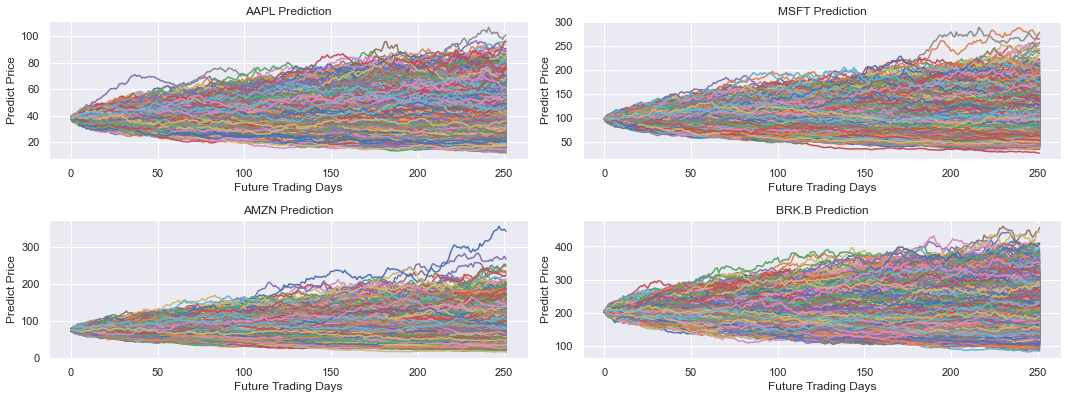

In [53]:
plt.figure(figsize=(15,8))

plt.subplot(3,2,1)
monte(aaplclose,aaplpct)
plt.xlabel("Future Trading Days");
plt.ylabel("Predict Price");
plt.title("AAPL Prediction");

plt.subplot(3,2,2)
monte(msftclose,msftpct)
plt.xlabel("Future Trading Days");
plt.ylabel("Predict Price");
plt.title("MSFT Prediction");

plt.subplot(3,2,3)
monte(amznclose,amznpct)
plt.xlabel("Future Trading Days");
plt.ylabel("Predict Price");
plt.title("AMZN Prediction");

plt.subplot(3,2,4)
monte(brkbclose,brkbpct)
plt.xlabel("Future Trading Days");
plt.ylabel("Predict Price");
plt.title("BRK.B Prediction");

plt.tight_layout()

The prospective outcomes of 10,000 different simulations are displayed. The final price disparity is substantial.

In [54]:
def montehist(ticker,pctchange):
    start_price = ticker["Close"][-1] # We will take the final day in our data as the start day and predict future price
    trading_days = len(ticker)
    cagr = ((ticker["Close"][-1] / ticker["Close"][0])**(1/trading_days)) - 1
    avr = pctchange.Close.std() * np.sqrt(252)

    for i in range(10000):
        dayily_return = np.random.normal(cagr/trading_days,avr/math.sqrt(trading_days),trading_days)+1

        list_price = [start_price]

        for j in dayily_return:
            list_price.append(list_price[-1]*j)
        
    print("First quartiles:",np.percentile(list_price, 25))
    print("Second quartiles:",np.percentile(list_price, 50))
    print("Third quartiles:",np.percentile(list_price, 75))
    sns.set(style="darkgrid")
    sns.histplot(data = list_price,bins=50,color = 'navy',kde = True);
    plt.axvline(np.percentile(list_price, 25),color = "r",label = "First quantiles",linewidth=2)
    plt.axvline(np.percentile(list_price, 50),color = "g",label = "Second quantiles",linewidth=2)
    plt.axvline(np.percentile(list_price, 75),color = "b",label = "Third quantiles",linewidth=2)
    plt.legend(loc = "upper left")    

In [55]:
def get_newdata(ticker):
                #Year/Month/Day
    starttime = "2019-01-01" # Start
    endtime = "2019-02-01" # End
    return yf.download(ticker,starttime,endtime,auto_adjust=True)

In [56]:
aapl2019 = get_newdata("AAPL")
print("AAPL 2019 first trading day actual closing price:",aapl2019["Close"][0])

msft2019 = get_newdata("MSFT")
print("MSFT 2019 first trading day actual closing price:",msft2019["Close"][0])

amzn2019 = get_newdata("AMZN")
print("AMZN 2019 first trading day actual closing price:",amzn2019["Close"][0])

brkb2019 = get_newdata("BRK-B")
print("BRK.B 2019 first trading day actual closing price:",brkb2019["Close"][0])

[*********************100%***********************]  1 of 1 completed
AAPL 2019 first trading day actual closing price: 38.10513687133789
[*********************100%***********************]  1 of 1 completed
MSFT 2019 first trading day actual closing price: 96.87468719482422
[*********************100%***********************]  1 of 1 completed
AMZN 2019 first trading day actual closing price: 76.95649719238281
[*********************100%***********************]  1 of 1 completed
BRK.B 2019 first trading day actual closing price: 202.8000030517578


First quartiles: 43.22079849806468
Second quartiles: 54.74983689737734
Third quartiles: 64.75375565335173
First quartiles: 86.60225336197563
Second quartiles: 90.96441947689011
Third quartiles: 93.74470245871862
First quartiles: 74.10085688491826
Second quartiles: 76.67586994540058
Third quartiles: 80.24947090255485
First quartiles: 209.64092621954887
Second quartiles: 231.84956929360763
Third quartiles: 245.20896996301656


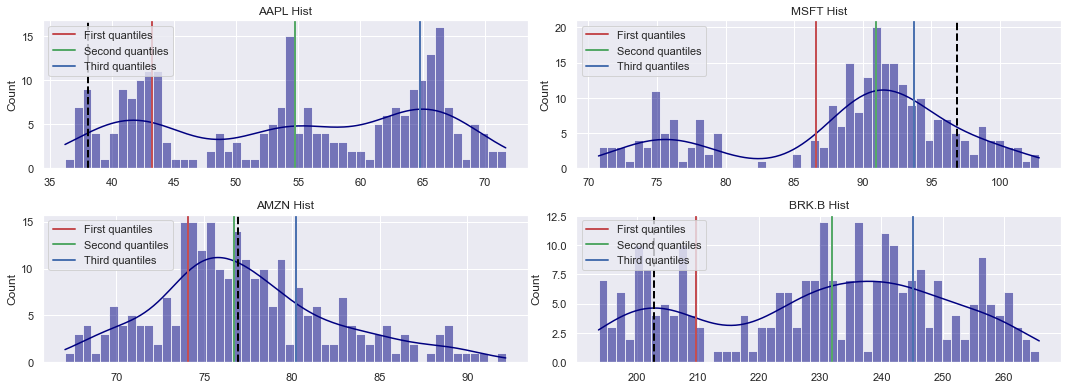

In [66]:
plt.figure(figsize=(15,8))

plt.subplot(3,2,1)
montehist(aaplclose,aaplpct)
plt.axvline(x = 38.105133056640625,color = "black",linestyle='dashed',linewidth=2,label = "Actual Future Price")
plt.title("AAPL Hist");

plt.subplot(3,2,2)
montehist(msftclose,msftpct)
plt.axvline(x = 96.87470245361328,color = "black",linestyle='dashed', linewidth=2,label = "Actual Future Price")
plt.title("MSFT Hist");

plt.subplot(3,2,3)
montehist(amznclose,amznpct)
plt.axvline(x = 76.95649719238281,color = "black",linestyle='dashed', linewidth=2,label = "Actual Future Price")
plt.title("AMZN Hist");

plt.subplot(3,2,4)
montehist(brkbclose,brkbpct)
plt.axvline(x = 202.8000030517578,color = "black",linestyle='dashed', linewidth=2,label = "Actual Future Price")
plt.title("BRK.B Hist");

plt.tight_layout()

After I plot it to the histogram. The black line represents the actual price of these four stocks. The range between the blue and red line represent the 25 to 75 percentile range.

As we can see from the histogram, the price predicted by our model does not quite fit with the actual price.

*LSTM Model to predict future stock price*

Next, we will use LSTM model to conduct machine learning to predict future stock trend.

Traditional linear models are difficult to solve multi-variable or multi-input problems, while neural networks, such as LSTM, are good at dealing with multi-variable problems, which makes it helpful to solve time series prediction problems.

However, for this research I will not build the LSTM model from scartch since it's way over what we have learned during this semester. Thanks to one of the package *Stocker* has helped us to build a very simple model using Keras, Keras is an advanced neural network API written in Python, and its core idea is to realize fast experiments.


Package Website: [STOCKER](https://github.com/jcamiloangarita/stocker/blob/master/stocker/lstm.py)

"Stocker is a python tool that uses ANN to predict the stock's close price for the next business day."

Credits to Author:
* Juan Camilo Gonzalez Angarita 
* Moses Maalidefaa Tantuoyir
* Anthony Ibeme

In order to feed our data to the model. We first modify our dataFrame first for only include the Date and Close price.

In [58]:
new_aapl = pd.DataFrame(index=range(0,len(aaplclose)),columns=["Date", "Close"])
 
for i in range(len(new_aapl)):
    new_aapl["Date"][i] = aaplclose.index[i]
    new_aapl["Close"][i] = aaplclose["Close"][i]

new_aapl["Date"] = pd.to_datetime(new_aapl.Date,format="%Y-%m-%d")
display(new_aapl)

,Date,Close
0,2018-01-02,40.950497
1,2018-01-03,40.943359
2,2018-01-04,41.133553
3,2018-01-05,41.601856
4,2018-01-08,41.44735
...,...,...
246,2018-12-24,35.429199
247,2018-12-26,37.92416
248,2018-12-27,37.678043
249,2018-12-28,37.69735


In [59]:
new_msft = pd.DataFrame(index=range(0,len(msftclose)),columns=["Date", "Close"])
 
for i in range(len(msftclose)):
    new_msft["Date"][i] = msftclose.index[i]
    new_msft["Close"][i] = msftclose["Close"][i]

new_msft["Date"] = pd.to_datetime(new_msft.Date,format="%Y-%m-%d")
#--------------------------------------------------------------------------------
new_amzn = pd.DataFrame(index=range(0,len(amznclose)),columns=["Date", "Close"])
 
for i in range(len(new_amzn)):
    new_amzn["Date"][i] = amznclose.index[i]
    new_amzn["Close"][i] = amznclose["Close"][i]

new_amzn["Date"] = pd.to_datetime(new_amzn.Date,format="%Y-%m-%d")
#--------------------------------------------------------------------------------
new_brkb = pd.DataFrame(index=range(0,len(brkbclose)),columns=["Date", "Close"])
 
for i in range(len(new_brkb)):
    new_brkb["Date"][i] = brkbclose.index[i]
    new_brkb["Close"][i] = brkbclose["Close"][i]

new_brkb["Date"] = pd.to_datetime(new_brkb.Date,format="%Y-%m-%d")

$MAPE = \frac{1}{N}  \sum_t^N   |  \frac{ E_{t} - A_{t}}{A_{t}}  | $

The LSTM model of this research mainly uses Mean absolute percentage error (MAPE) as the evaluation standard. Compare the main training set error loss train_loss, verification set error loss val_loss, and prediction set error loss pre_loss. Obviously, the lower the value of the error, the better the effect of model fitting.

In [60]:
import stocker
aapllstm = stocker.lstm.run(new_aapl, features=[], steps=1, training=0.8, error_method='mape') # Mean absolute percentage error 
msftlstm = stocker.lstm.run(new_msft, features=[], steps=1, training=0.8, error_method='mape')
amznlstm = stocker.lstm.run(new_amzn, features=[], steps=1, training=0.8, error_method='mape')
brkblstm = stocker.lstm.run(new_brkb, features=[], steps=1, training=0.8, error_method='mape')

2/2 [==============================] - 0s 2ms/step


The purpose of this experiment is to apply the LSTM model to stock data prediction and to learn the processing and transformation of time series data by using LSTM to predict stock returns. 

Although it is technically possible to utilize LSTM to predict stock data, this experiment's results are not promising. 

We should research feature selection, model design, model parameter selection, and optimization if we expect to develop an effective LSTM model for the stock market.

In [61]:
print("Final AAPL Predict Price $",aapllstm[0][0])
print("AAPL Error Perent",aapllstm[0][1],"%")
print("Actual Price is: $",aapl2019["Close"][0])

Final AAPL Predict Price $ 38.58
AAPL Error Perent 2.22 %
Actual Price is: $ 38.10513687133789


In [62]:
print("Final MSFT Predict Price $",msftlstm[0][0])
print("MSFT Error Perent",msftlstm[0][1],"%")
print("Actual Price is: $",msft2019["Close"][0])

Final MSFT Predict Price $ 97.03
MSFT Error Perent 1.934 %
Actual Price is: $ 96.87468719482422


In [63]:
print("Final AMZN Predict Price $",amznlstm[0][0])
print("AMZN Error Perent",amznlstm[0][1],"%")
print("Actual Price is: $",amzn2019["Close"][0])

Final AMZN Predict Price $ 75.48
AMZN Error Perent 2.855 %
Actual Price is: $ 76.95649719238281


In [64]:
print("Final BRK.B Predict Price $",brkblstm[0][0])
print("BRK.B Error Perent",brkblstm[0][1],"%")
print("Actual Price is: $",brkb2019["Close"][0])

Final BRK.B Predict Price $ 203.52
BRK.B Error Perent 1.338 %
Actual Price is: $ 202.8000030517578


Here is another fun feature of Stocker, We can use stocker.predict to predict the future price.

However, as we can see on the graph. Besides AAPL and BRK-B, the other two stocks' predictions are quite off.

But from the movement of the predicted price, we can grasp an idea of how it takes past prices to predict future movement.

[*********************100%***********************]  1 of 1 completed
2/2 [==============================] - 0s 2ms/step


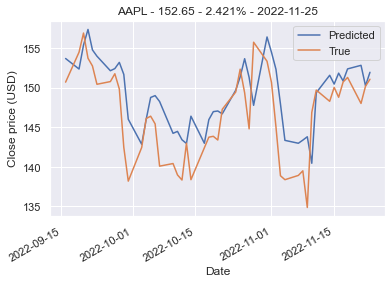

[*********************100%***********************]  1 of 1 completed
2/2 [==============================] - 0s 2ms/step


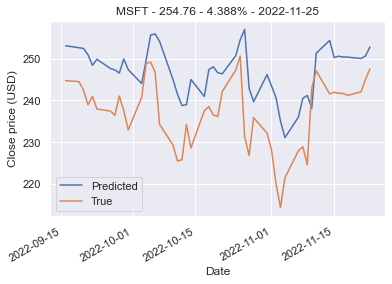

[*********************100%***********************]  1 of 1 completed
2/2 [==============================] - 0s 2ms/step


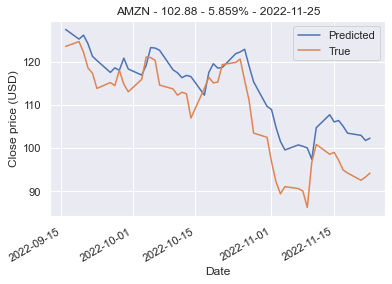

[*********************100%***********************]  1 of 1 completed
2/2 [==============================] - 0s 3ms/step


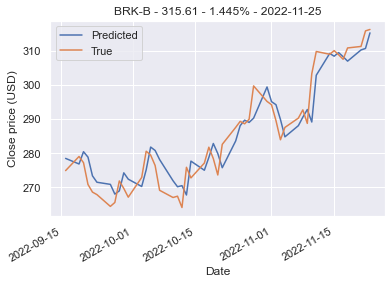

[315.61, 1.445, '2022-11-25']

In [65]:
sns.set()

stocker.predict.tomorrow("AAPL", features=None, steps=1, training=0.8, period=50, years=1, error_method='mape', plot=True)
stocker.predict.tomorrow("MSFT", features=None, steps=1, training=0.8, period=50, years=1, error_method='mape', plot=True)
stocker.predict.tomorrow("AMZN", features=None, steps=1, training=0.8, period=50, years=1, error_method='mape', plot=True)
stocker.predict.tomorrow("BRK-B", features=None, steps=1, training=0.8, period=50, years=1, error_method='mape', plot=True)

## Results

_From this research, we see that we frequently get inaccurate outcomes if we try to estimate the yield distribution of the test data using the mean/variance parameter of the training data. Another way to look at this is that it demonstrates how difficult it may be to anticipate the rate of return on financial assets using mathematical prediction models (like machine learning or deep learning)._

_The reason for stock price fluctuation is very complicated, which makes it difficult to guarantee the same correlation of the data sent to training. Even expert financial analysts may not be able to precisely assess the influence of the stock price due to its various influencing factors, and the stock price's movement is not entirely described by scientific principles. The low signal-to-noise of the financial market itself leads to the problem of over-fitting in machine learning._

_In the financial market, machine learning algorithms use historical prices to predict the price delayed by one day as we can see from our model of Monte Carlo Simulation. In this case, measuring with machine learning indicators often leads to an overestimation of the performance._

_From the above part when we mentioned the possible reason why AAPL stock price changed. What really affects the stock price are "expectation" and "unknown information". These can't exist in the models learned by machines based on historical data, and naturally, it can't predict the future stock price trend. Therefore, artificial intelligence technologies such as machine learning can't help predict the stock price, because no one can predict the news that hasn't happened yet._

_But this is not to say that machine learning and artificial intelligence technology are worthless for stock forecasting. Instead, by analyzing historical data and past events, the machine can analyze and summarize the rules, and then when new news is released, the machine can make a bigger, more comprehensive, and more objective judgment on the upcoming impact than human beings. This is the real value of machine learning in stock forecasting._

### References

_Jcamiloangarita. “JCAMILOANGARITA/Stocker: Stock Price Prediction.” GitHub, https://github.com/jcamiloangarita/stocker._

_Smigel, Leo. “Yfinance Python Tutorial (2022).” Analyzing Alpha, 27 Apr. 2022, https://analyzingalpha.com/yfinance-python._


_“Yfinance.” PyPI, https://pypi.org/project/yfinance/._

_Moreno, Amanda Iglesias. Moving Average Technical Analysis with Python. https://towardsdatascience.com/moving-average-technical-analysis-with-python-2e77633929cb._

_“How to Calculate Moving Average in a Pandas DataFrame?” GeeksforGeeks, 15 June 2022, https://www.geeksforgeeks.org/how-to-calculate-moving-average-in-a-pandas-dataframe/._

_Chan, Keith. “Beginner's Python Financial Analysis Walk-Through - Part 4.” Medium, Analytics Vidhya, 1 Sept. 2020, https://medium.com/analytics-vidhya/beginners-python-financial-analysis-walk-through-part-4-8ff5dd958af9._

_Shah, Ishan. “Stock Market Data: Obtaining Data, Visualization &amp; Analysis in Python.” Quantitative Finance &amp; Algo Trading Blog by QuantInsti, Quantitative Finance &amp; Algo Trading Blog by QuantInsti, 2 June 2022, https://blog.quantinsti.com/stock-market-data-analysis-python/._

_Foy, Peter. “Python for Finance: Data Visualization.” MLQ.ai, MLQ.ai, 27 May 2021, https://www.mlq.ai/python-for-finance-data-visualization/._

_Fizell, Zack. How to Create a Monte Carlo Simulation Using Python. https://towardsdatascience.com/how-to-create-a-monte-carlo-simulation-using-python-c24634a0978a._

_Teo, Bee Guan. “Simulating Random Walk of Stock Prices with Monte Carlo Simulation in Python.” Medium, The Handbook of Coding in Finance, 19 Sept. 2021, https://medium.com/the-handbook-of-coding-in-finance/simulating-random-walk-of-stock-prices-with-monte-carlo-simulation-in-python-6e233d841e._

_“Simulating Future Stock Prices Using Monte Carlo Methods in Python.” InterviewQs, https://www.interviewqs.com/blog/intro-monte-carlo._

_Felkl M.Sc., Linnart. “Monte-Carlo Simulation in Python.” SCDA, 11 July 2022, https://www.supplychaindataanalytics.com/monte-carlo-simulation-of-stock-prices-using-python/._

_Kavanagh, Robin. “What Is Compound Annual Growth Rate?” Business Insider, Business Insider, https://www.businessinsider.com/personal-finance/cagr._

_“Volatility Formula: Calculator (Examples with Excel Template).” EDUCBA, 24 Mar. 2021, https://www.educba.com/volatility-formula/._

_Team, Keras. “Simple. Flexible. Powerful.” Keras, https://keras.io/._

_“Keras Tutorial: The Ultimate Beginner's Guide to Deep Learning in Python.” EliteDataScience, 8 July 2022, https://elitedatascience.com/keras-tutorial-deep-learning-in-python._

_“Statistical Data Visualization#.” Seaborn, https://seaborn.pydata.org/index.html._

_Nik. “Creating Pair Plots in Seaborn with SNS Pairplot • Datagy.” Datagy, 23 May 2022, https://datagy.io/seaborn-pairplot/._

_“Seaborn Heatmap Using Sns.heatmap(): Python Seaborn Tutorial.” Indian AI Production, 8 Sept. 2019, https://indianaiproduction.com/seaborn-heatmap/._

_Kharwal, Aman. “Stock Price Prediction Using Machine Learning: Aman Kharwal.” Thecleverprogrammer, 14 Nov. 2020, https://thecleverprogrammer.com/2020/11/14/stock-price-prediction-using-machine-learning/._